In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

# 8.1 A General Strategy for Modelling Nonlinear Regression Functions

In [141]:
# load the `CASchools` dataset
CASchools=pd.read_csv('CASchools.csv')

# add student-teacher ratio
CASchools['STR'] = CASchools['students']/CASchools['teachers']

# add average test-score
CASchools['score'] = (CASchools['read'] + CASchools['math'])/2

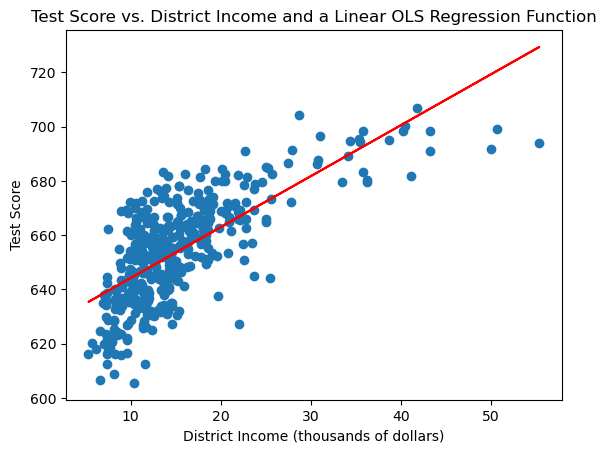

In [11]:
# fit a simple linear model
linear_model = smf.ols("score ~ income", data=CASchools).fit()

# plot the observations
plt.scatter(CASchools["income"], CASchools["score"])
plt.xlabel("District Income (thousands of dollars)")
plt.ylabel("Test Score")
plt.title("Test Score vs. District Income and a Linear OLS Regression Function")

# add the regression line to the plot
plt.plot(CASchools["income"], linear_model.predict(CASchools), color='red')

plt.show()


In [17]:
# fit the quadratic model
quadratic_model = smf.ols("score ~ income + I(income**2)", data=CASchools).fit(cov_type='HC1')

# obtain the model summary with heteroskedasticity-robust standard errors
quadratic_model.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,607.3017,2.902,209.288,0.000,601.614,612.989
income,3.8510,0.268,14.364,0.000,3.326,4.376
I(income ** 2),-0.0423,0.005,-8.851,0.000,-0.052,-0.033


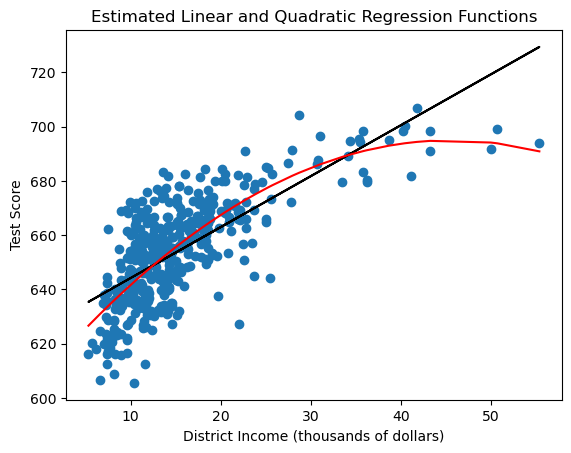

In [20]:
# draw a scatterplot of the observations for income and test score
plt.scatter(CASchools["income"], CASchools["score"])
plt.xlabel("District Income (thousands of dollars)")
plt.ylabel("Test Score")
plt.title("Estimated Linear and Quadratic Regression Functions")

# add a linear function to the plot
plt.plot(CASchools["income"], linear_model.predict(CASchools), 
         color="black")

# add quadratic function to the plot
order_id = CASchools["income"].argsort()
plt.plot(CASchools["income"][order_id], 
         quadratic_model.fittedvalues[order_id], 
         color="red")

plt.show()


# 8.2 Nonlinear Functions of a Single Independent Variable 

## Polynomials

In [142]:
# Generate raw cubic polynomial features
CASchools["income2"]=CASchools["income"]**2
CASchools["income3"]=CASchools["income"]**3

# Estimate a cubic model
cubic_model = smf.ols("score ~ income + income2 + income3 ", data=CASchools).fit(cov_type='HC1')

print(cubic_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     270.2
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.81e-97
Time:                        11:19:11   Log-Likelihood:                -1661.6
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     416   BIC:                             3347.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    600.0790      5.102    117.615      0.0

In [41]:
cubic_model.f_test("income=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=50.33951679143506, p=5.606352040656709e-12, df_denom=416, df_num=1>

In [43]:
# set up hypothesis matrix
R = np.array([[0, 0, 0, 1], [0, 0, 1, 0]])
# do the test
f_test = cubic_model.f_test(R)
print(f_test.summary())

<F test: F=37.69069732297891, p=9.043184276527694e-16, df_denom=416, df_num=2>


In [45]:
cubic_model = smf.ols("score ~ income + income2 + income3 ", data=CASchools_poly).fit()
cubic_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,600.0790,5.830,102.937,0.000,588.620,611.538
income,5.0187,0.859,5.839,0.000,3.329,6.708
income2,-0.0958,0.037,-2.564,0.011,-0.169,-0.022
income3,0.0007,0.000,1.452,0.147,-0.000,0.002


In [46]:
# test the hypothesis using robust standard errors
cubic_model = smf.ols("score ~ income + income2 + income3 ", data=CASchools_poly).fit(cov_type='HC1')
cubic_model.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,600.0790,5.102,117.615,0.000,590.079,610.079
income,5.0187,0.707,7.095,0.000,3.632,6.405
income2,-0.0958,0.029,-3.309,0.001,-0.153,-0.039
income3,0.0007,0.000,1.975,0.048,5.25e-06,0.001


### Interpretation of Coefficients in Nonlinear Regression Models

In [47]:
# compute and assign the quadratic model
quadratic_model = smf.ols('score ~ income + I(income ** 2)', data=CASchools).fit()

# set up data for prediction
new_data = pd.DataFrame({'income': [10, 11]})

# do the prediction
Y_hat = quadratic_model.predict(new_data)

# compute the difference
np.diff(Y_hat)


array([2.96251653])

In [49]:
# set up data for prediction
new_data = pd.DataFrame({'income': [40, 41]})

# do the prediction
Y_hat = quadratic_model.predict(new_data)

# compute the difference
np.diff(Y_hat)

array([0.42400972])

## Logarithms

### Case I: $X$ is in Logarithm, $Y$ is not

In [86]:
# estimate a level-log model
LinearLog_model= smf.ols('score ~ np.log(income)', data=CASchools).fit(cov_type='HC1')

# compute robust summary
LinearLog_model.summary().tables[1]


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,557.8323,3.840,145.271,0.000,550.306,565.358
np.log(income),36.4197,1.397,26.071,0.000,33.682,39.158


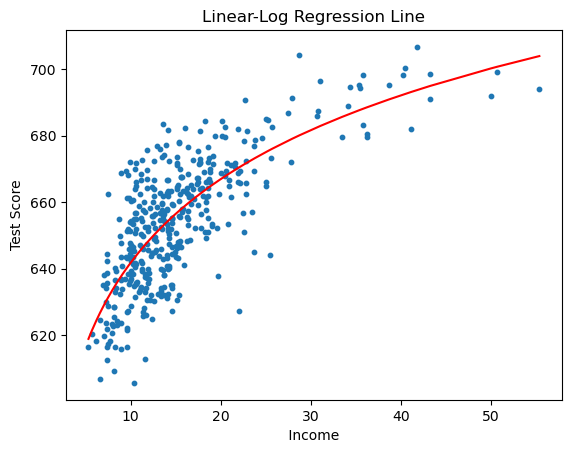

In [97]:
# draw a scatterplot
plt.scatter(CASchools["income"], CASchools["score"],s=10)
plt.xlabel(" Income ")
plt.ylabel("Test Score")
plt.title("Linear-Log Regression Line")

# add the linear-log regression line
order_id = np.argsort(CASchools["income"])
plt.plot(CASchools["income"][order_id], LinearLog_model.fittedvalues[order_id], color='r')

# show the plot
plt.show()


In [77]:
# set up new data
new_data = pd.DataFrame({'income': [10, 11, 40, 41]})

# predict the outcomes 
Y_hat = linearlog_model.predict(new_data)

# compute the expected difference
Y_hat_matrix = Y_hat.values.reshape((2,2))
Y_hat_matrix[:, 1] - Y_hat_matrix[:, 0]

array([3.47116618, 0.89929703])

### Case II: $Y$ is in Logarithm, $X$ is not

In [85]:
# estimate a log-linear model 
LogLinear_model  = smf.ols('np.log(score) ~ income', data=CASchools).fit(cov_type='HC1')

#summary
LogLinear_model.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,6.4394,0.003,2225.210,0.000,6.434,6.445
income,0.0028,0.000,16.244,0.000,0.003,0.003


### Case III:  $X$ and $Y$ are in Logarithms

In [84]:
# estimate a log-linear model 
LogLog_model = smf.ols('np.log(score) ~ np.log(income)', data=CASchools).fit(cov_type='HC1')

#summary
LogLog_model.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,6.3363,0.006,1069.500,0.000,6.325,6.348
np.log(income),0.0554,0.002,25.841,0.000,0.051,0.060


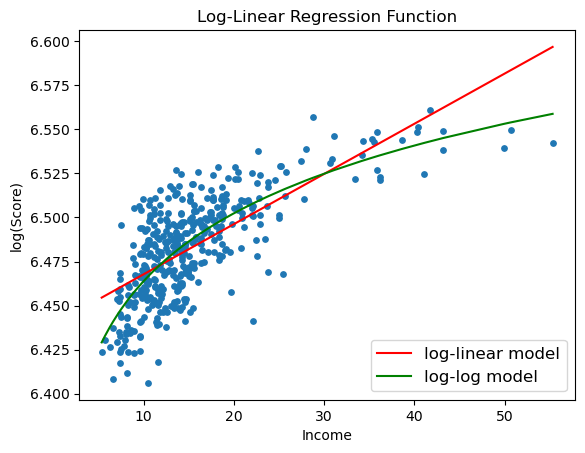

In [96]:
# generate a scatterplot
plt.scatter(CASchools['income'], np.log(CASchools['score']), s=15)
plt.title('Log-Linear Regression Function')
plt.xlabel('Income')
plt.ylabel('log(Score)')

# add the log-linear regression line
order_id = np.argsort(CASchools['income'])
plt.plot(CASchools['income'][order_id], 
         LogLinear_model.predict(CASchools)[order_id], 
         color = 'red', 
         label='log-linear model')

# add the log-log regression line
plt.plot(np.sort(CASchools['income']), 
         LogLog_model.predict(pd.DataFrame({'income':np.sort(CASchools['income'])})), 
         color = 'green', 
          label='log-log model')

# add a legend
plt.legend(loc='lower right', 
           fontsize = 'large')
plt.show()


In [101]:
# estimate the polylog model
polyLog_model = smf.ols(formula = 'score ~ np.log(income) + np.power(np.log(income),2) + np.power(np.log(income),3)',
data = CASchools).fit()

#summary
polyLog_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,486.1341,95.988,5.065,0.000,297.452,674.816
np.log(income),113.3820,105.316,1.077,0.282,-93.635,320.399
"np.power(np.log(income), 2)",-26.9111,37.882,-0.710,0.478,-101.375,47.553
"np.power(np.log(income), 3)",3.0632,4.462,0.687,0.493,-5.707,11.834


In [109]:
# compute the adj. R^2 for the nonlinear models
adj_R2 = pd.DataFrame({"adj_R2": [quadratic_model.rsquared_adj,
                                  cubic_model.rsquared_adj,
                                  LinearLog_model.rsquared_adj,
                                  LogLinear_model.rsquared_adj,
                                  LogLog_model.rsquared_adj,
                                  polyLog_model.rsquared_adj]})

#adj_R2.index.name = None  # remove the index name
print(adj_R2)


     adj_R2
0  0.554044
1  0.555228
2  0.561460
3  0.497011
4  0.556725
5  0.559994


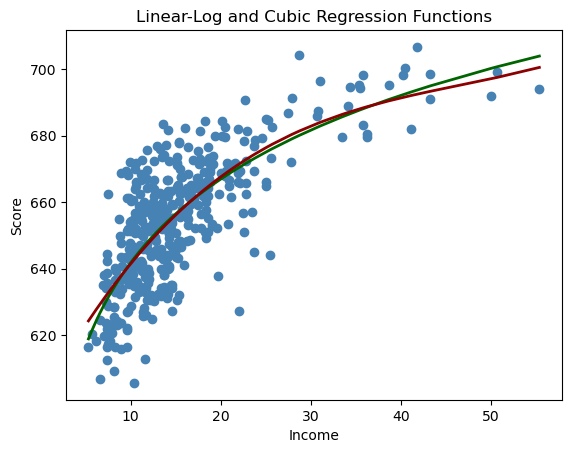

In [143]:
# Generate a scatterplot
plt.scatter(CASchools["income"], CASchools["score"], color="steelblue", marker="o")
plt.title("Linear-Log and Cubic Regression Functions")
plt.xlabel("Income")
plt.ylabel("Score")

# Add the linear-log regression line
#order_id = CASchools["income"].argsort()
plt.plot(CASchools["income"][order_id], LinearLog_model.predict(CASchools.iloc[order_id]), color="darkgreen", linewidth=2)

# Add the cubic regression line
plt.plot(CASchools["income"][order_id], cubic_model.predict(CASchools.iloc[order_id]), color="darkred", linewidth=2)

plt.show()


# 8.3 Interactions Between Independent Variables

In [145]:
# append HiSTR to CASchools
CASchools['HiSTR'] = CASchools['STR'].apply(lambda x: 1 if x >= 20 else 0)

# append HiEL to CASchools
CASchools['HiEL'] = CASchools['english'].apply(lambda x: 1 if x >= 10 else 0)


In [147]:
# estimate the model with a binary interaction term
bi_model = smf.ols(formula='score ~ HiSTR * HiEL', data=CASchools).fit(cov_type='HC1')

#Summary
bi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     59.78
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.75e-32
Time:                        13:04:04   Log-Likelihood:                -1760.0
No. Observations:                 420   AIC:                             3528.
Df Residuals:                     416   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.1433      1.388    478.459      0.000     661.423     666.864
HiSTR         -1.9078      1.932     -0.987      0.323      -5.695       1.879
HiEL         -18.3155      2.334     -7.847      0.000     -22.890     -13.741
HiSTR:HiEL    -3.2601      3.119     -1.045      0.296      -9.373       2.853
==============================================================================
Omnibus:                        7.998   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.251
Skew:                           0.336   Prob(JB):                       0.0162
Kurtosis:                       2.856   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [151]:
# estimate means for all combinations of HiSTR and HiEL
print(bi_model.predict({"HiSTR": [0], "HiEL": [0]}))
print(bi_model.predict({"HiSTR": [0], "HiEL": [1]}))
print(bi_model.predict({"HiSTR": [1], "HiEL": [0]}))
print(bi_model.predict({"HiSTR": [1], "HiEL": [1]}))

0    664.143286
dtype: float64
0    645.827778
dtype: float64
0    662.235444
dtype: float64
0    640.659807
dtype: float64


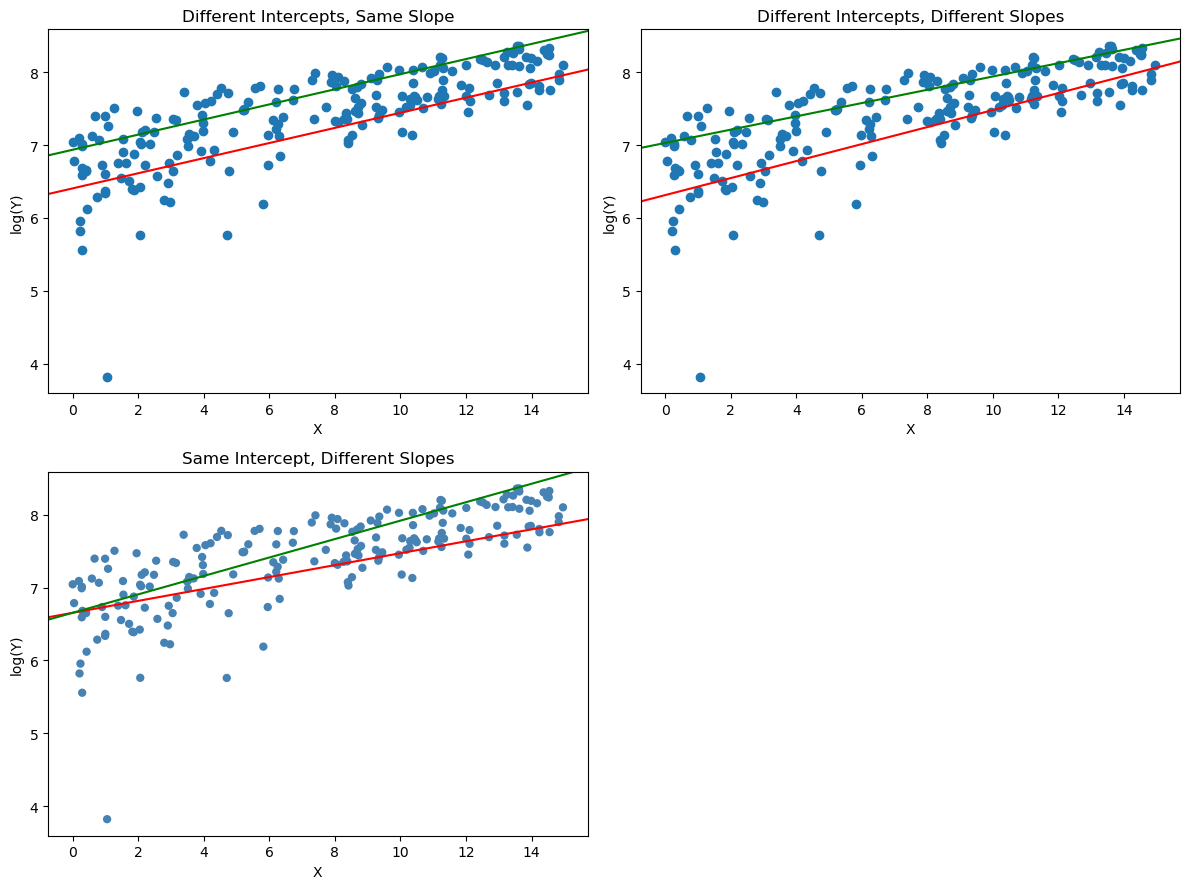

In [189]:
# generate artificial data
np.random.seed(1)

X = np.random.uniform(low=0, high=15, size=200)
D = np.random.choice([0, 1], size=200, replace=True)
Y = 450 + 150 * X + 500 * D + 50 * (X * D) + np.random.normal(scale=300, size=200)
data=pd.DataFrame({'X':X, 'D':D, 'Y':Y})
# divide plotting area accordingly
fig, axes= plt.subplots(2, 2, figsize=(12, 9))

# estimate the models and plot the regression lines

# 1. (baseline model)
ax = axes[0, 0]
ax.scatter(X, np.log(Y))
ax.set_title("Different Intercepts, Same Slope")
ax.set_xlabel("X")
ax.set_ylabel("log(Y)")

#fit the model
mod1_coef = smf.ols(formula='np.log(Y) ~ X + D', data=data).fit().params
# Add the regression line to the plot
ax.axline((0,mod1_coef[0]), slope=mod1_coef[1], color='r')
ax.axline((0,mod1_coef[0]+mod1_coef[2]), slope=mod1_coef[1], color='green')


# 2. (baseline model + interaction term)
ax = axes[0, 1]
ax.scatter(X, np.log(Y))
ax.set_title("Different Intercepts, Different Slopes")
ax.set_xlabel("X")
ax.set_ylabel("log(Y)")


mod2_coef = smf.ols(formula='np.log(Y) ~ X + D+X:D', data=data).fit().params
ax.axline((0,mod2_coef[0]), slope=mod2_coef[1], color='r')
ax.axline((0,mod2_coef[0]+mod2_coef[2]), slope=mod2_coef[1]+mod2_coef[3], color='green')


# 3. (omission of D as regressor + interaction term)
ax = axes[1,0]
ax.scatter(X, np.log(Y), c="steelblue", marker="o", edgecolors="none")
ax.set_title("Same Intercept, Different Slopes")
ax.set_xlabel("X")
ax.set_ylabel("log(Y)")


mod2_coef = smf.ols(formula='np.log(Y) ~ X +X:D', data=data).fit().params
ax.axline((0,mod2_coef[0]), slope=mod2_coef[1], color='r')
ax.axline((0,mod2_coef[0]), slope=mod2_coef[1]+mod2_coef[2], color='green')

# remove the empty plot in the bottom right
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


### Application to the Student-Teacher Ratio and the Percentage of English Learners

In [195]:
# estimate the model
bci_model = smf.ols('score ~ STR + HiEL + STR * HiEL', data = CASchools).fit()

bci_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,682.2458,10.511,64.908,0.000,661.585,702.907
STR,-0.9685,0.540,-1.794,0.074,-2.030,0.093
HiEL,5.6391,16.718,0.337,0.736,-27.223,38.501
STR:HiEL,-1.2766,0.844,-1.512,0.131,-2.936,0.383


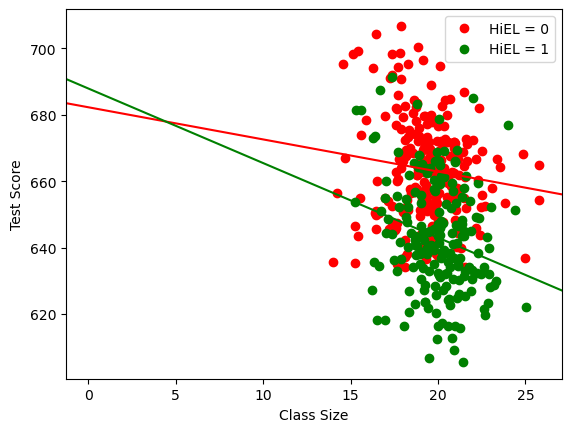

In [209]:
# identify observations with PctEL >= 10
id = CASchools['english'] >= 10

# plot observations with HiEL = 0 as red dots
plt.plot(CASchools['STR'][~id], CASchools['score'][~id],'ro',label = 'HiEL = 0')

plt.xlabel('Class Size')
plt.ylabel('Test Score')

# plot observations with HiEL = 1 as green dots
plt.plot(CASchools['STR'][id], CASchools['score'][id], 'go', label = 'HiEL = 1')

# read out estimated coefficients of bci_model
coefs = bci_model.params

# draw the estimated regression line for HiEL = 0
plt.axline((0,coefs[0]), slope=coefs[1],color = 'red')

# draw the estimated regression line for HiEL = 1
plt.axline((0,coefs[0]+coefs[2]), slope=coefs[1]+coefs[3],color = 'g')

# add a legend to the plot
plt.legend(loc = 'upper right');


### Interactions Between Two Continuous Variables

In [211]:
# estimate regression model including the interaction between 'PctEL' and 'size'
cci_model= smf.ols('score ~ STR + english + english * STR', data = CASchools).fit()

#summary
cci_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,686.3385,9.403,72.995,0.000,667.856,704.821
STR,-1.1170,0.483,-2.315,0.021,-2.066,-0.169
english,-0.6729,0.438,-1.536,0.125,-1.534,0.188
english:STR,0.0012,0.022,0.053,0.958,-0.042,0.044


In [212]:
CASchools['english'].describe()

count    420.000000
mean      15.768155
std       18.285927
min        0.000000
25%        1.940807
50%        8.777634
75%       22.970003
max       85.539719
Name: english, dtype: float64

### Example: The Demand for Economic Journals

In [214]:
Journals=pd.read_csv('Journals.csv')

In [215]:
# define and rename variables
Journals['PricePerCitation'] = Journals['price'] / Journals['citations']
Journals['Age'] = 2000 - Journals['foundingyear']
Journals['Characters'] = Journals['charpp'] * Journals['pages'] / 10**6
Journals['Subscriptions'] = Journals['subs']


In [217]:
# compute summary statistics for price per citation
Journals['PricePerCitation'].describe()

count    180.000000
mean       2.548455
std        3.466444
min        0.005223
25%        0.464495
50%        1.320513
75%        3.440171
max       24.459459
Name: PricePerCitation, dtype: float64

In [230]:
# Estimate models (I) - (IV)
Journals_mod1 = smf.ols('np.log(Subscriptions) ~ np.log(PricePerCitation)', data=Journals).fit()

Journals_mod2 = smf.ols('np.log(Subscriptions) ~ np.log(PricePerCitation) + np.log(Age) + np.log(Characters)', data=Journals).fit(cov_type='HC1')

Journals_mod3 = smf.ols('np.log(Subscriptions) ~ np.log(PricePerCitation) + I(np.log(PricePerCitation)**2) + I(np.log(PricePerCitation)** 3) + np.log(Age) + np.multiply(np.log(Age), np.log(PricePerCitation)) + np.log(Characters)', data=Journals).fit(cov_type='HC1')

Journals_mod4 = smf.ols('np.log(Subscriptions) ~ np.log(PricePerCitation) + np.log(Age) + np.multiply(np.log(Age), np.log(PricePerCitation)) + np.log(Characters)', data=Journals).fit(cov_type='HC1')


In [231]:
Journals_mod3.f_test("I(np.log(PricePerCitation) ** 2)=0, I(np.log(PricePerCitation) ** 3)=0")
#Journals_mod3.summary()

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.24896326503580557, p=0.7798874461817539, df_denom=173, df_num=2>

In [232]:
Stargazer([Journals_mod1 , Journals_mod2,Journals_mod3, Journals_mod4])

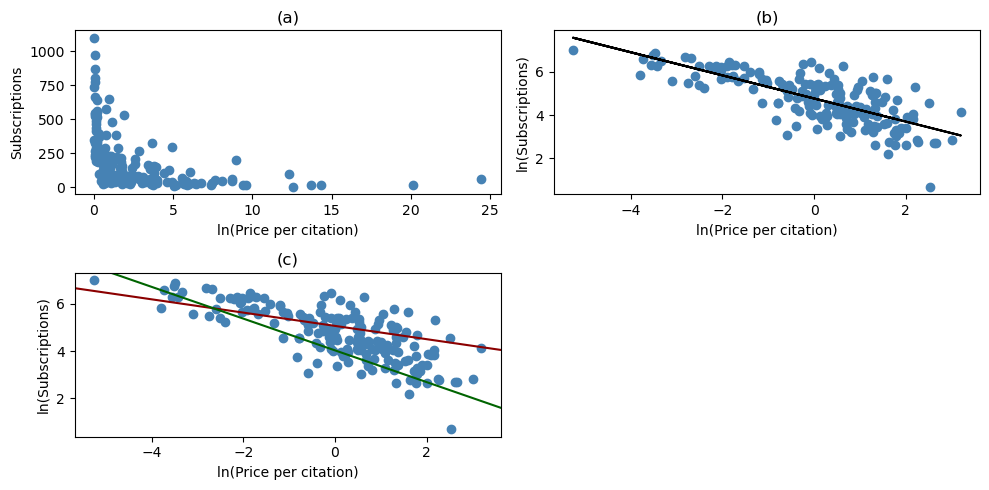

In [254]:

#Divide plot

fig, axes= plt.subplots(2, 2, figsize=(10, 5))
# scatterplot
ax1 = axes[0, 0]
ax1.plot(Journals['PricePerCitation'], Journals['Subscriptions'], 'o', color='steelblue')
ax1.set_xlabel('ln(Price per citation)')
ax1.set_ylabel('Subscriptions')
ax1.set_title('(a)')

# log-log scatterplot and estimated regression line (I)
ax2 = axes[0, 1]
ax2.plot(np.log(Journals['PricePerCitation']), np.log(Journals['Subscriptions']), 'o', color='steelblue')
ax2.set_xlabel('ln(Price per citation)')
ax2.set_ylabel('ln(Subscriptions)')
ax2.set_title('(b)')
ax2.plot(np.log(Journals['PricePerCitation']), Journals_mod1.predict(), color='black', linewidth=1.5)

# log-log scatterplot and regression lines (IV) for Age = 5 and Age = 80
ax3 = axes[1,0]
ax3.plot(np.log(Journals['PricePerCitation']), np.log(Journals['Subscriptions']), 'o', color='steelblue')
ax3.set_xlabel('ln(Price per citation)')
ax3.set_ylabel('ln(Subscriptions)')
ax3.set_title('(c)')

JM4C = Journals_mod4.params

# age = 80

ax3.axline((0,JM4C[0]+JM4C[2]*np.log(80)),slope=JM4C[1]+JM4C[3]*np.log(80), color='darkred')

# age = 5
ax3.axline((0,JM4C[0]+JM4C[2]*np.log(5)),slope=JM4C[1]+JM4C[3]*np.log(5), color='darkgreen')

# remove the empty plot in the bottom right
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


# 8.4 Nonlinear Effects on Test Scores of the Student-Teacher Ratio

In [256]:


# estimate all models
TestScore_mod1 = smf.ols(formula='score ~ STR + english + lunch', data=CASchools).fit(cov_type = "HC1")

TestScore_mod2 = smf.ols(formula='score ~ STR + english + lunch + np.log(income)', data=CASchools).fit(cov_type = "HC1")

TestScore_mod3 = smf.ols(formula='score ~ STR + HiEL + HiEL:STR', data=CASchools).fit(cov_type = "HC1")

TestScore_mod4 = smf.ols(formula='score ~ STR + HiEL + HiEL:STR + lunch + np.log(income)', data=CASchools).fit(cov_type = "HC1")

TestScore_mod5 = smf.ols(formula='score ~ STR + I(STR**2) + I(STR**3) + HiEL + lunch + np.log(income)', data=CASchools).fit(cov_type = "HC1")

TestScore_mod6 = smf.ols(formula='score ~ STR + I(STR**2) + I(STR**3) + HiEL + HiEL:STR + HiEL:I(STR**2) + HiEL:I(STR**3) + lunch + np.log(income)',
    data=CASchools).fit(cov_type = "HC1")

TestScore_mod7 = smf.ols(formula='score ~ STR + I(STR**2) + I(STR**3) + english + lunch + np.log(income)', data=CASchools).fit(cov_type = "HC1")


In [257]:
Stargazer([TestScore_mod1, TestScore_mod2, TestScore_mod3, TestScore_mod4, TestScore_mod5, TestScore_mod6, TestScore_mod7])

In [260]:
TestScore_mod6.f_test("HiEL:STR=0,HiEL:I(STR ** 2)=0,HiEL:I(STR ** 3)")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.6902530598410217, p=0.04596890382135436, df_denom=410, df_num=3>

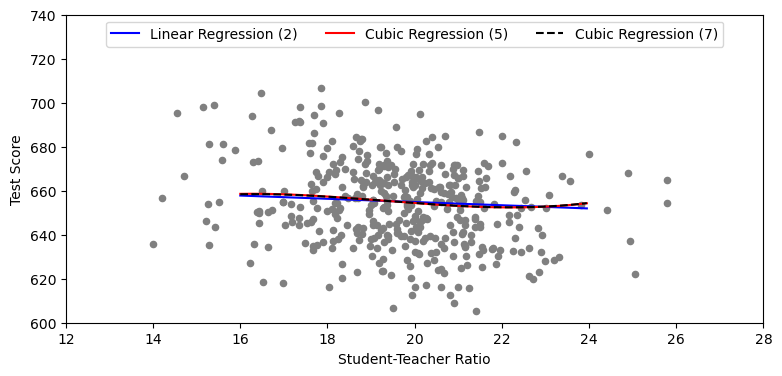

In [272]:

# scatterplot
plt.figure(figsize=(9, 4))
plt.scatter(CASchools['STR'], CASchools['score'], s=20, c='gray')
plt.xlim(12, 28)
plt.ylim(600, 740)
plt.xlabel('Student-Teacher Ratio')
plt.ylabel('Test Score')



# data for use with predict()
new_data = pd.DataFrame({'STR': np.arange(16, 24, 0.05), 
                         'english': np.mean(CASchools['english']),
                         'lunch': np.mean(CASchools['lunch']),
                         'income': np.mean(CASchools['income']),
                         'HiEL': np.mean(CASchools['HiEL'])})

# add estimated regression function for model (2)
fitted = TestScore_mod2.predict(new_data)

plt.plot(new_data['STR'],fitted, lw=1.5,  c='blue', label='Linear Regression (2)')

# add estimated regression function for model (5)
fitted = TestScore_mod5.predict(new_data)

plt.plot(new_data['STR'], fitted, lw=1.5, c='red', label='Cubic Regression (5)')

# add estimated regression function for model (7)
fitted = TestScore_mod7.predict(new_data)

plt.plot(new_data['STR'], fitted,  lw=1.5, 
         c='black', 
         ls='--', label='Cubic Regression (7)')

# add a legend
plt.legend(loc='upper center', ncol=3)

plt.show()


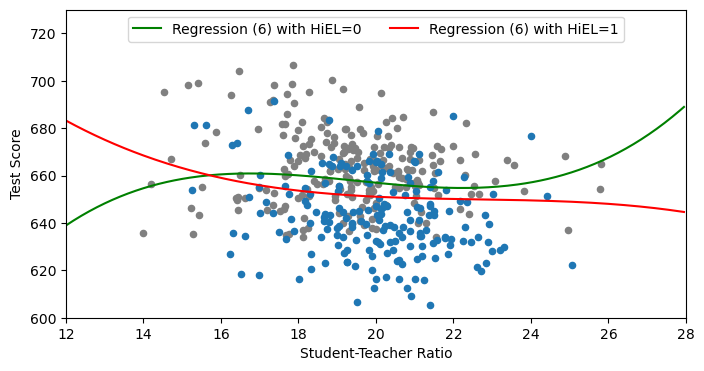

In [273]:
# draw scatterplot
plt.figure(figsize=(8, 4))

# observations with HiEL = 0
plt.scatter(CASchools.loc[CASchools['HiEL'] == 0, 'STR'], 
            CASchools.loc[CASchools['HiEL'] == 0, 'score'], 
            color = "gray",  s = 20)

# observations with HiEL = 1
plt.scatter(CASchools.loc[CASchools['HiEL'] == 1, 'STR'], 
            CASchools.loc[CASchools['HiEL'] == 1, 'score'], s = 20)




# data for use with 'predict()'
new_data = pd.DataFrame({'STR': np.arange(12, 28, 0.05), 
                         'english': np.mean(CASchools['english']),
                         'lunch': np.mean(CASchools['lunch']),
                         'income': np.mean(CASchools['income']),
                         'HiEL': 0})

# add estimated regression function for model (6) with HiEL=0
fitted = TestScore_mod6.predict(new_data)

plt.plot(new_data['STR'], fitted, linewidth = 1.5, color = "green", label="Regression (6) with HiEL=0")

# add estimated regression function for model (6) with HiEL=1
new_data['HiEL'] = 1

fitted = TestScore_mod6.predict(new_data)

plt.plot(new_data['STR'],fitted,linewidth = 1.5, color = "red", label="Regression (6) with HiEL=1")

plt.xlim(12, 28)
plt.ylim(600, 730)
plt.xlabel("Student-Teacher Ratio")
plt.ylabel("Test Score")
# add a legend
plt.legend(loc='upper center', ncol=2)
plt.show()


----------------------